<a href="https://colab.research.google.com/github/blkzen/wallstreetbetsnlp/blob/main/WallStreetBetsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import iplot
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=False)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

!pip install nltk
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WallStreetBets/reddit_wsb.csv', parse_dates=['timestamp'])
df = pd.DataFrame(data=data)
df

title  ...           timestamp
0      It's not about the money, it's about sending a...  ... 2021-01-28 21:37:41
1      Math Professor Scott Steiner says the numbers ...  ... 2021-01-28 21:32:10
2                                        Exit the system  ... 2021-01-28 21:30:35
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  ... 2021-01-28 21:28:57
4      Not to distract from GME, just thought our AMC...  ... 2021-01-28 21:26:56
...                                                  ...  ...                 ...
32560  Small win for a diamond handed sucker like mys...  ... 2021-02-07 06:01:32
32561  I know every1 hates S3 but here are some numbe...  ... 2021-02-07 06:01:27
32562  "This is for you, dad" Interview with an anony...  ... 2021-02-07 05:59:34
32563  tought on WSB and what happened during the pas...  ... 2021-02-07 05:57:07
32564  Some loss porn for ya! Since some of ya'll got...  ... 2021-02-07 05:56:06

[32565 rows x 8 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32565 entries, 0 to 32564
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      32565 non-null  object        
 1   score      32565 non-null  int64         
 2   id         32565 non-null  object        
 3   url        32565 non-null  object        
 4   comms_num  32565 non-null  int64         
 5   created    32565 non-null  float64       
 6   body       16911 non-null  object        
 7   timestamp  32565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
df.drop(columns=['body','created'], inplace=True)
df.set_index('id', inplace=True)

In [5]:
df['score'] = df['score'].astype(float)
df['comms_num'] = df['comms_num'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32565 entries, l6ulcx to le5df7
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      32565 non-null  object        
 1   score      32565 non-null  float64       
 2   url        32565 non-null  object        
 3   comms_num  32565 non-null  float64       
 4   timestamp  32565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.corr()>.7

score  comms_num
score       True      False
comms_num  False       True

In [8]:
color = sns.color_palette()
fig = px.histogram(df, x="score")
fig.update_traces(marker_color="turquoise", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1)
fig.update_layout(title_text='Product Score')
fig.show()
configure_plotly_browser_state()

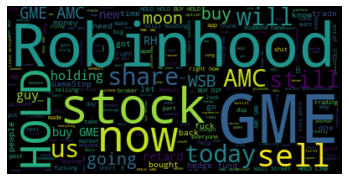

In [9]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud1.png')
plt.show()

In [10]:
df = df[df['score'] != 51]
df['sentiment'] = df['score'].apply(lambda rating : +1 if rating > 51 else -1)

In [11]:
df

title  ...  sentiment
id                                                         ...           
l6ulcx  It's not about the money, it's about sending a...  ...          1
l6uibd  Math Professor Scott Steiner says the numbers ...  ...          1
l6uhhn                                    Exit the system  ...         -1
l6ugk6  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  ...         -1
l6ufgy  Not to distract from GME, just thought our AMC...  ...          1
...                                                   ...  ...        ...
le5hp8  Small win for a diamond handed sucker like mys...  ...         -1
le5hmn  I know every1 hates S3 but here are some numbe...  ...         -1
le5fuo  "This is for you, dad" Interview with an anony...  ...         -1
le5e59  tought on WSB and what happened during the pas...  ...         -1
le5df7  Some loss porn for ya! Since some of ya'll got...  ...         -1

[32497 rows x 6 columns]

In [12]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

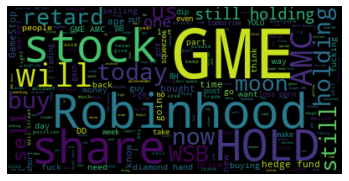

In [13]:
#Positive
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment

pos = " ".join(review for review in positive.title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud2.png')
plt.show()

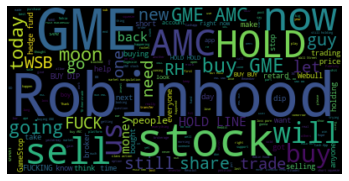

In [14]:
#Negative
neg = " ".join(review for review in negative.title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud3.png')
plt.show()

In [15]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()
configure_plotly_browser_state()